## Day 2

### Celestial Coordinates

- The celestial sphere
- RA, DEC
- ICRS
- Compute RA, DEC of the sources in the image.
- Use `astropy.coordinates` to transform RA, DEC to Galactic coordinates
- Overlay galactic grid over the wcsaxes image
- Clean up notebook and get it ready for presentation

#### The Celestial System


A useful construct for describing locations of objects in the sky is the celestial sphere, which is considered to have an infinite radius. The center of the earth is the center of the celestial sphere, and the sphere's pole and equatorial plane are coincident with those of the earth. We can specify precise location of objects on the celestial sphere by giving the celestial equivalent of their latitudes and longitudes.

The point on the celestial sphere directly overhead for an observer is the zenith. An imaginary arc passing through the celestial poles and through the zenith is called the observer's meridian. The nadir is the direction opposite the zenith: for example, straight down from a spacecraft to the center of the planet.

Another important feature intersecting the celestial sphere is the **ecliptic** plane. This is the plane in which the Earth orbits the sun, 23.4° from the celestial equator. The great circle marking the intersection of the ecliptic plane on the celestial sphere is where the sun and planets appear to travel, and it's where the Sun and Moon converge during their eclipses (hence the name).


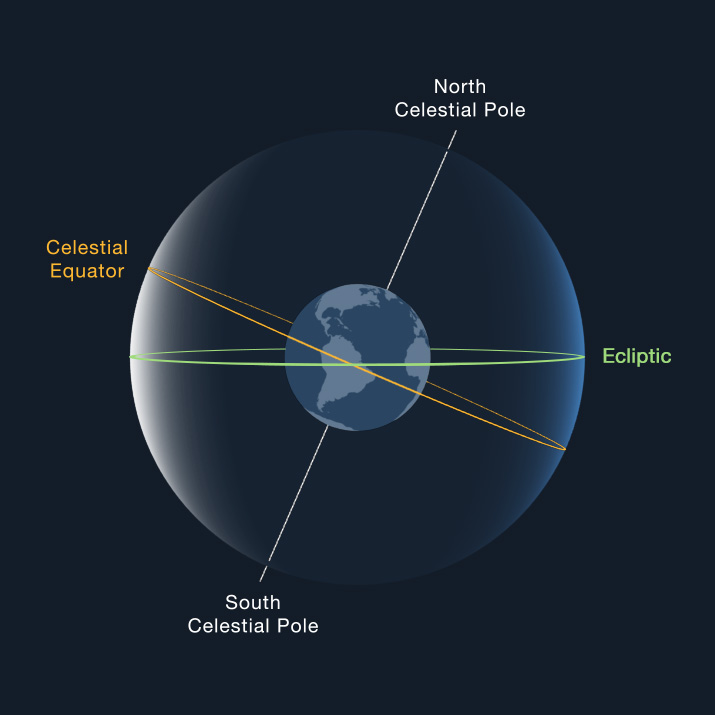

In [29]:
from IPython.display import Image
Image('celestial_sphere.jpg')


#### Declination and Right Ascension

**Declination** (`DEC`) is the celestial sphere's equivalent of latitude and it is expressed in degrees, as is latitude. For DEC, + and - refer to north and south, respectively. The celestial equator is 0° DEC, and the poles are +90° and -90°.

**Right ascension** `RA` is the celestial equivalent of longitude. RA can be expressed in degrees, but it is more common to specify it in hours, minutes, and seconds of time: the sky appears to turn 360° in 24 hours, or 15° in one hour. So an hour of RA equals 15° of sky rotation.

The zero point for `RA` is one of the points where the ecliptic circle intersects the celestial equator circle. It's defined to be the point where the sun crosses into the northern hemisphere beginning spring: the **vernal equinox**, also known as the first point of Aries, often identified by the symbol of the ram.

The RA and DEC of an object specify its position uniquely on the celestial sphere just as the latitude and longitude do for an object on the Earth's surface. For example, the very bright star Sirius has celestial coordinates 6 hr 45 min RA and -16° 43' DEC.

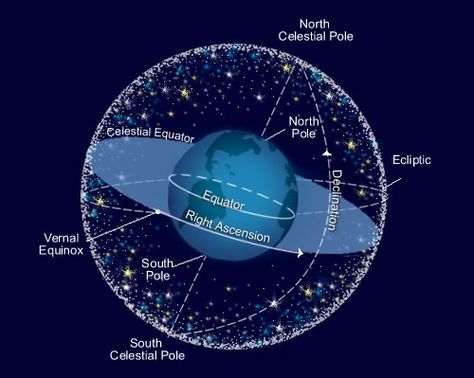

In [28]:
Image('celestial_coords.jpg')

#### The International Celestial Reference System

The International Celestial Reference System (ICRS) is the fundamental celestial reference system that has been adopted by the International Astronomical Union (IAU) for high-precision positional astronomy. The ICRS, with its origin at the solar system barycenter and "space fixed" axis directions, is meant to represent the most appropriate coordinate system for positions and motions of celestial objects. RA and DEC measurements can be transformed to the ICRS sytem

In [11]:
from astropy import coordinates as coord
import astropy.units as u
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook

In [12]:
from astropy.io import fits
from astropy import table
from astropy import wcs

#### Transform x, y to celestial coordinates

Let's go back to our image and the sources we identified in it yesterday.
In this section we will read the X, Y coordinates from the file `sources.csv` and will compute the corresponding celestial coordinates.

`astropy.Table.read` can read files in several different formats, including `cvs`.

In [89]:
sources = table.Table.read('sources.csv')

x, y = sources['xcentroid'], sources['ycentroid']

In [90]:
f = fits.open('ib2j02020_drz.fits')
w = wcs.WCS(f[1].header)
sky_coord = w.pixel_to_world(x, y)

In [91]:
sky_coord

<SkyCoord (ICRS): (ra, dec) in deg
    [(6.06758707, -72.06419756), (6.06833798, -72.06445269),
     (6.06618364, -72.0638162 ), ..., (6.05777469, -72.12891349),
     (6.05519731, -72.12828154), (6.05633645, -72.12864239)]>

In [92]:
sky_coord.frame

<ICRS Coordinate: (ra, dec) in deg
    [(6.06758707, -72.06419756), (6.06833798, -72.06445269),
     (6.06618364, -72.0638162 ), ..., (6.05777469, -72.12891349),
     (6.05519731, -72.12828154), (6.05633645, -72.12864239)]>

In [93]:
ra = sky_coord.data.lon

In [94]:
dec=sky_coord.spherical.lat

<IPython.core.display.Javascript object>


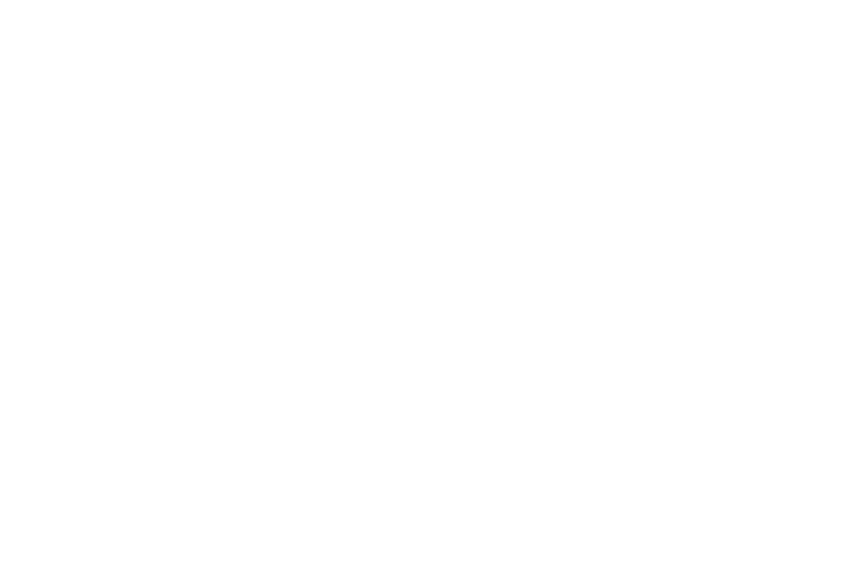

<IPython.core.display.Javascript object>


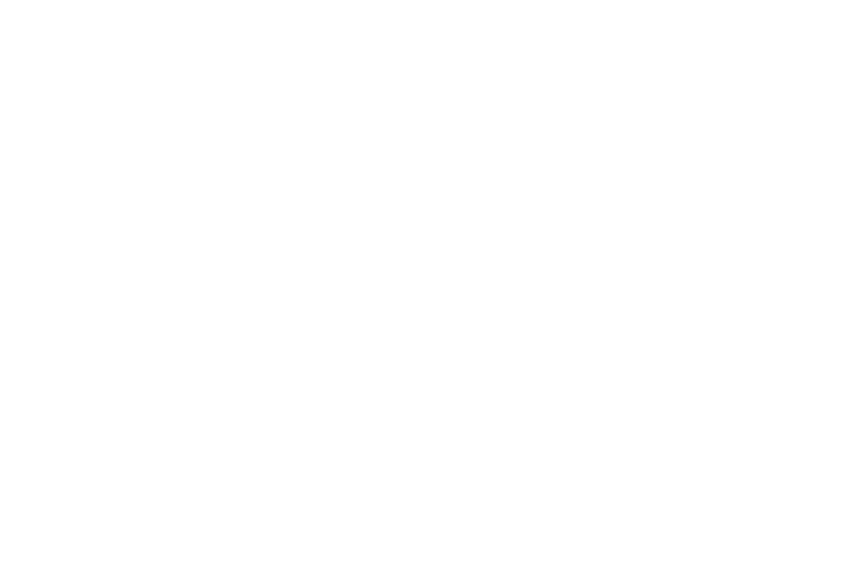

In [101]:
%matplotlib inline
%matplotlib notebook
ax = plt.subplot(projection=w)
ax.imshow(f[1].data, vmin=.1, vmax=.5, cmap='Greys', origin='lower')
ax.scatter(ra, dec, transform=ax.get_transform('world'))
ax.coords[0].set_format_unit(u.degree)

In [102]:
ax.grid(color='green', ls='solid')
overlay=ax.get_coords_overlay('galactic') 
overlay.grid(color='red', linestyle='solid', alpha=0.5)

In [60]:
#sky_coord.galactic